<a href="https://colab.research.google.com/github/sahin-arslan/SayisalGoruntuIslemeFinal/blob/main/SayisalGoruntuIslemeFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.	Kütüphanelerin İçe Aktarılması



*   Veri işleme için pandas, sayısal işlemler için numpy, opencv ve skimage görselleştirme için matplotlib ve seaborn kütüphanelerini içe aktarın.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io, filters, exposure, morphology, measure
import os
from skimage.measure import regionprops
from skimage.filters import try_all_threshold
from skimage.measure import regionprops, label
from skimage.morphology import disk, closing, opening


*   Ayrıca os modülünü kullanarak dosya yolunu belirtin.

In [4]:
!git clone https://github.com/hardik0/AI-for-Medicine-Specialization
%cd AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/

Cloning into 'AI-for-Medicine-Specialization'...
remote: Enumerating objects: 1601, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1601 (delta 9), reused 2 (delta 0), pack-reused 1573 (from 1)
Receiving objects: 100% (1601/1601), 720.36 MiB | 32.13 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (1497/1497), done.
/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis


## 2. Görüntü Yükleme ve Görselleştirme

1.   Rasgele görüntü seçme
  *   train_df içindeki "Image" sütunundan rastgele 9 görüntü seçin.
  *   Bu görüntüleri yan yana görselleştirerek veri setindeki örnek görüntüleri inceleyin.








In [5]:
# veri setimizi okuyoruz
train_df = pd.read_csv("nih/train-small.csv")

# ilk on satırını yazdırıyoruz
train_df.head(10)

Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0  00008270_015.png            0             0              0      0   
1  00029855_001.png            1             0              0      0   
2  00001297_000.png            0             0              0      0   
3  00012359_002.png            0             0              0      0   
4  00017951_001.png            0             0              0      0   
5  00001232_002.png            1             1              0      0   
6  00017135_000.png            0             0              0      0   
7  00027235_000.png            0             0              0      0   
8  00014197_007.png            0             0              0      0   
9  00011584_002.png            0             0              0      0   

   Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
0         0          0         0       0             0     0       0   
1         1          0         0       0             1     0       0   
2         0          0         0       0             0     0       0   
3         0          0         0       0             0     0       0   
4         0          0         0       0             1     0       0   
5         1          0         0       0             1     0       0   
6         0          0         0       0             0     0       0   
7         0          0         0       0             0     0       0   
8         0          0         0       0             0     0       0   
9         0          0         0       0             0     0       0   

   PatientId  Pleural_Thickening  Pneumonia  Pneumothorax  
0       8270                   0          0             0  
1      29855                   0          0             0  
2       1297                   1          0             0  
3      12359                   0          0             0  
4      17951                   0          0             0  
5       1232                   0          0             0  
6      17135                   0          0             0  
7      27235                   0          0             0  
8      14197                   0          0             0  
9      11584                   0          0             0

In [6]:
print(f'Toplam satır sayısı \t: {train_df.shape[0]}')
print(f'Toplam sutun sayısı \t:   {train_df.shape[1]}')

Toplam satır sayısı 	: 1000
Toplam sutun sayısı 	:   16


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

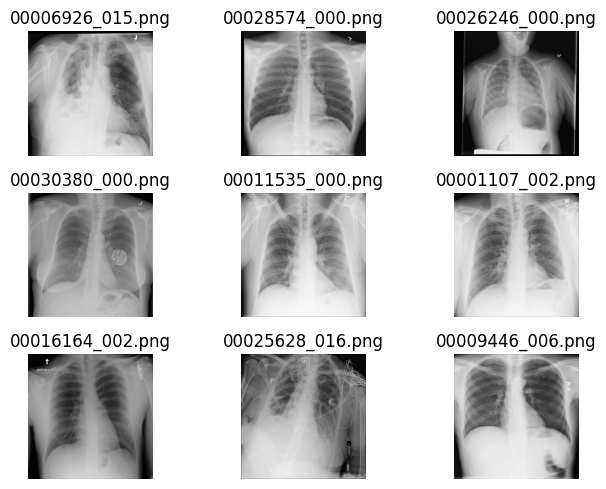

In [11]:
# veri setinden görüntü kolununu alıyoruz.
images = train_df['Image'].values

random_images_count = 9

# 9 tane random görüntü seciyoruz
random_images = [np.random.choice(images) for i in range(random_images_count)]

# Görüntülerin yolunu set ediyoruz
img_dir = 'nih/images_small/'

# Görüntülerin boyutunu set ediyoruz.
plt.figure(figsize=(7, 5))

# Görüntüleri ekrana basma işlemini yapıyoruz
for i in range(random_images_count):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.title(f"{random_images[i]}")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

## 3. Görüntü İşleme ve İyileştirme (Pre-processing)


  1.   Görüntüleri Akciğer bölgeleri kaybolmayacak şekilde kenarlardan kırpın (Crop),(ilgi alanı dışındaki gürültü bölgelerinden kurtulun
      *   Orijinal ve Crop edilmiş görüntüleri görseleştirin.
  2.   Arasınav ödevi çıktılarını inceleyerek Kontrast Germe (Stretching) Histogram Eşitleme (Equalization) yöntemlerinden uygun gördüğünüzü crop edilmiş görüntüye uygulayın.
      *   Crop edilmişve dönüşüme uğramış  görüntüleri görseleştirin.
  3.   Bir önceki adımın çıktısına gürültü azaltma işlemlerinden birini seçerek uygulayın (örn: Median ve Gaussian Blur).
      *   Görüntüleri görseleştirin










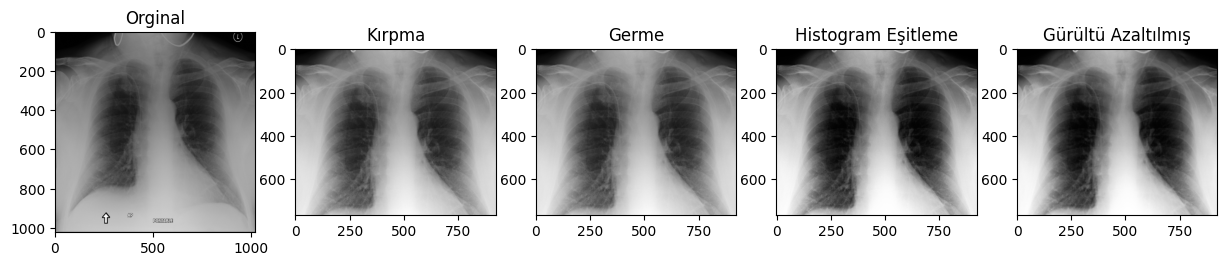

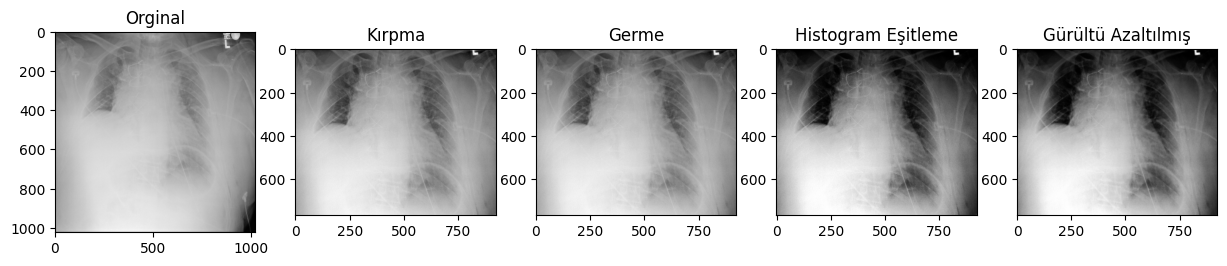

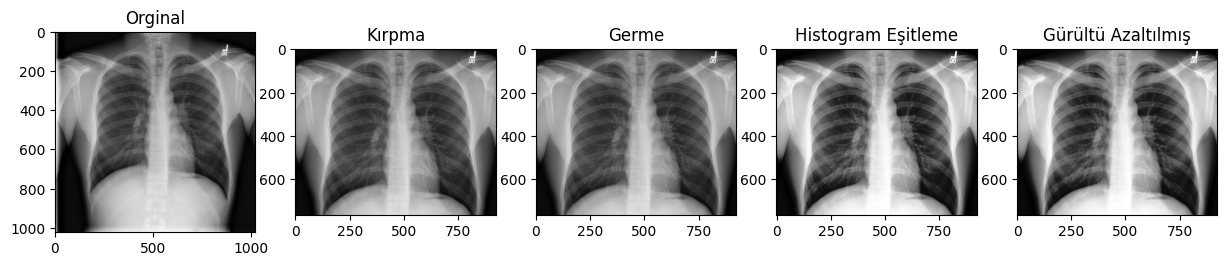

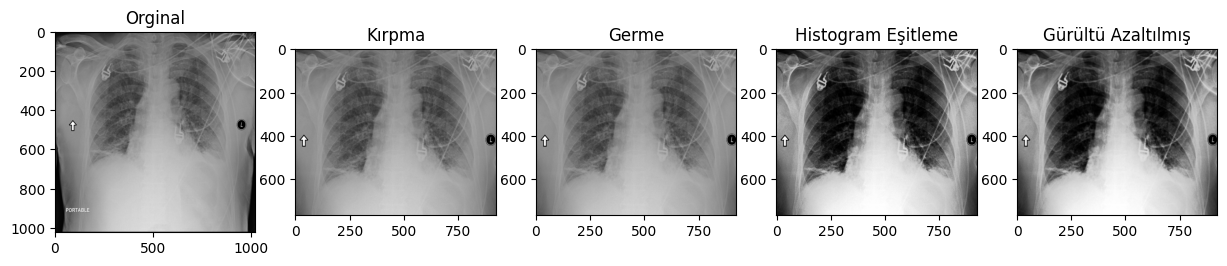

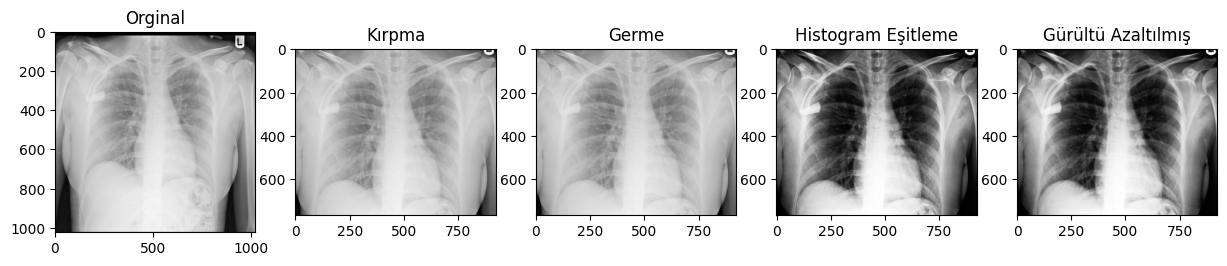

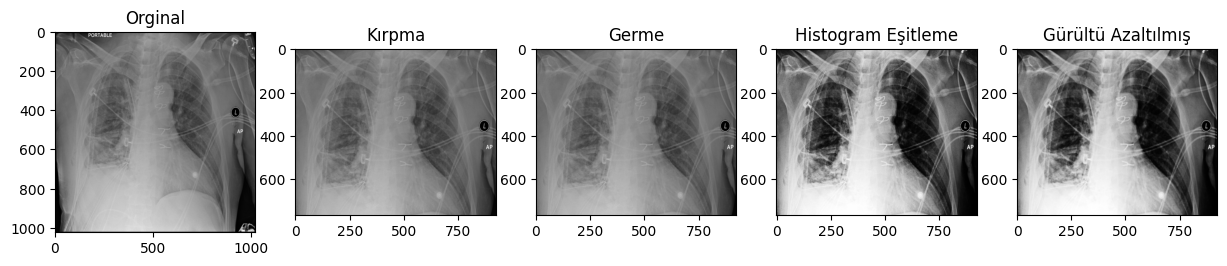

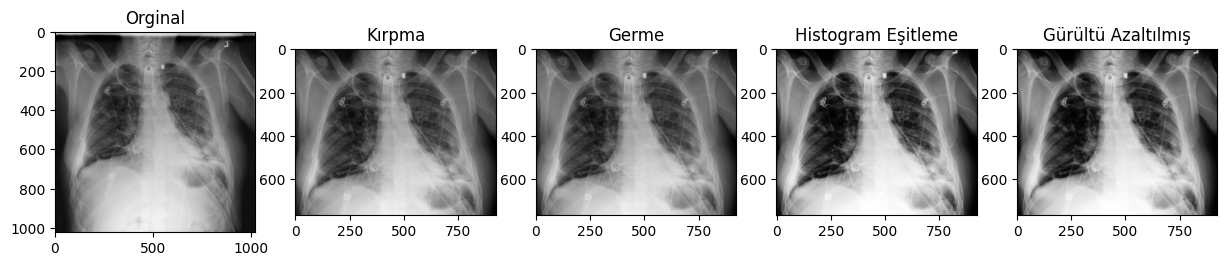

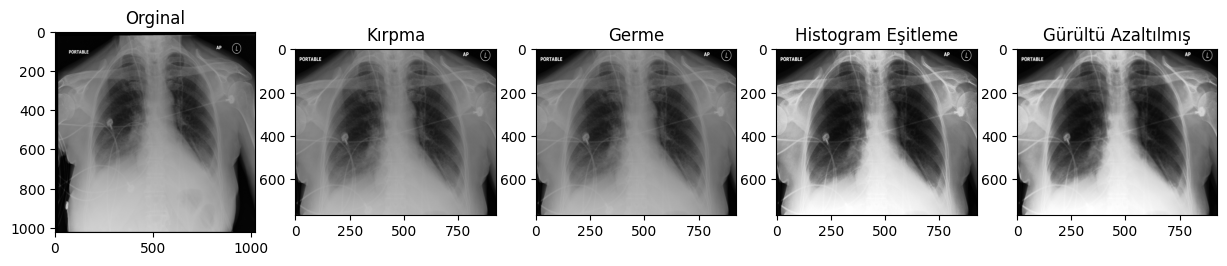

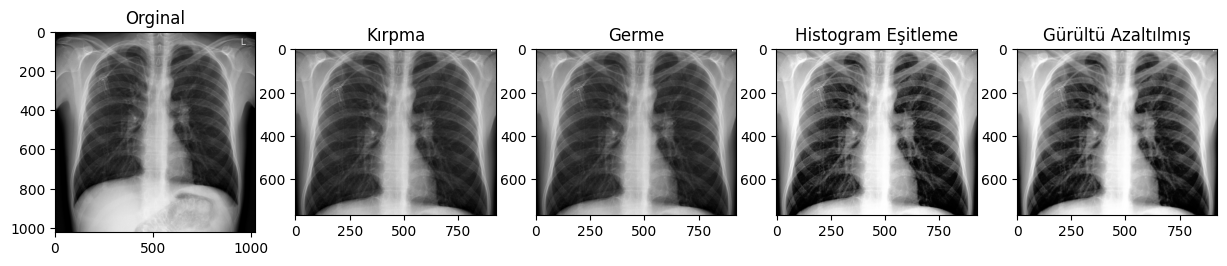

In [10]:
denoised_images =[]

for image_name in random_images:
    image_path = os.path.join(img_dir, image_name)
    image = io.imread(image_path)

    # Kenarlardan kırpıyoruz
    cropped_image = image[60:-200, 50:-50]

    # Kontrast germe yapıyoruz
    stretched_image = exposure.rescale_intensity(cropped_image, in_range='image', out_range=(0, 255))

    # Histogram eşitliyoruz
    equalized_image = exposure.equalize_hist(stretched_image) * 255

    # Gürültü Azaltma İşlemi yapıyoruz
    denoised_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)
    denoised_images.append(denoised_image)

    # Görselleri ekrana basıyoruz.
    fig, ax = plt.subplots(1, 5, figsize=(15, 5))
    ax[0].imshow(image, cmap="gray")
    ax[0].set_title("Orginal")
    ax[1].imshow(cropped_image, cmap="gray")
    ax[1].set_title("Kırpma")
    ax[2].imshow(stretched_image, cmap="gray")
    ax[2].set_title("Germe")
    ax[3].imshow(equalized_image, cmap="gray")
    ax[3].set_title("Histogram Eşitleme")
    ax[4].imshow(denoised_image, cmap="gray")
    ax[4].set_title("Gürültü Azaltılmış")
    plt.show()

## 4. Thresholding
  1.	Global Thresholding, Otsu veya skimage all filter kütüphanesini kullanarak (from skimage.filters import try_all_threshold) https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html en az 2 thresholding yöntemi  ile eşik değerlerini belirleyiniz.
  2.	Eşik değerlerini görüntülere uygulayarak binary görüntüleri görselleştirip uygun thresholding yöntemini i seçiniz. (YORUM)


Otsu Threshold: 127.51467263009707
Li Threshold: 101.93415525164305


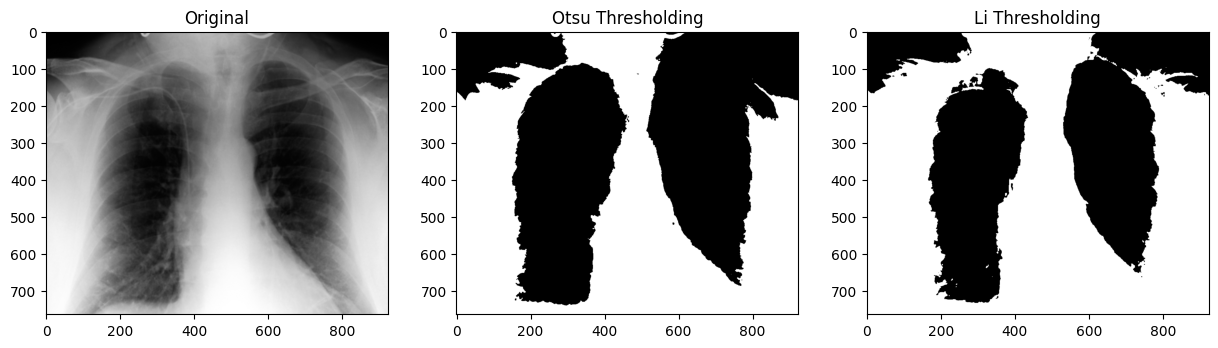

Otsu Threshold: 127.9995746266747
Li Threshold: 102.51024503967744


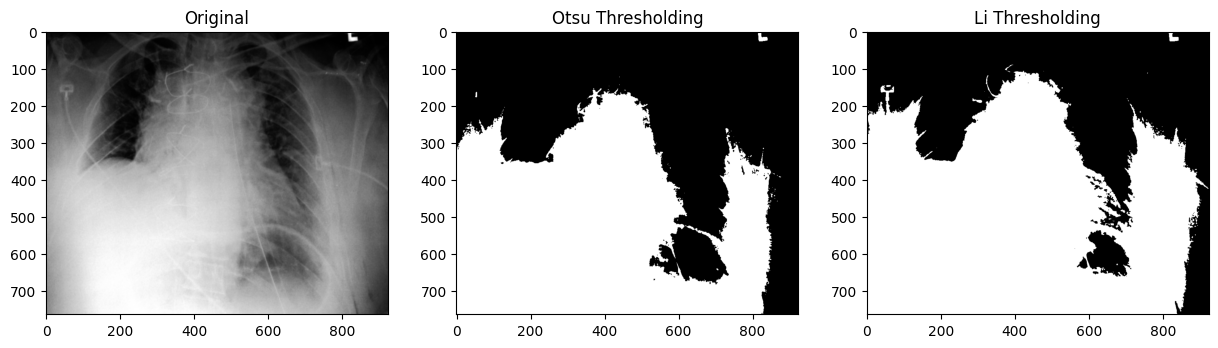

Otsu Threshold: 127.20710352659376
Li Threshold: 102.79385119862883


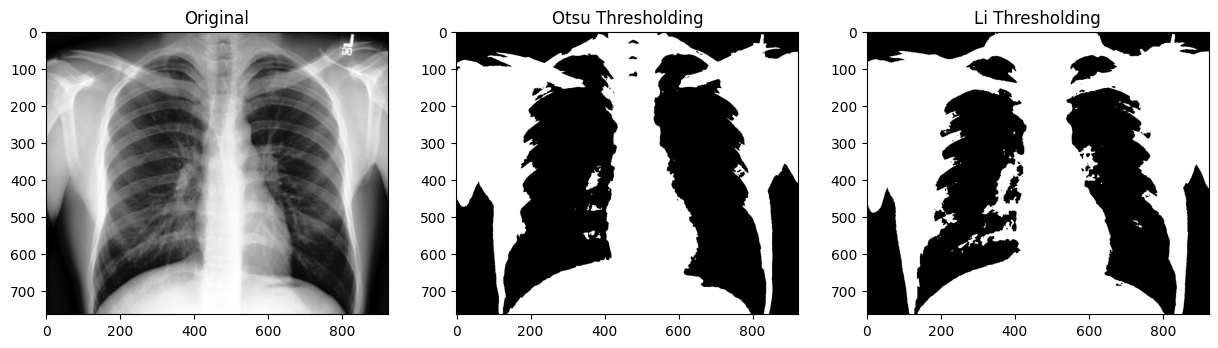

Otsu Threshold: 127.28934023133382
Li Threshold: 102.12659338953539


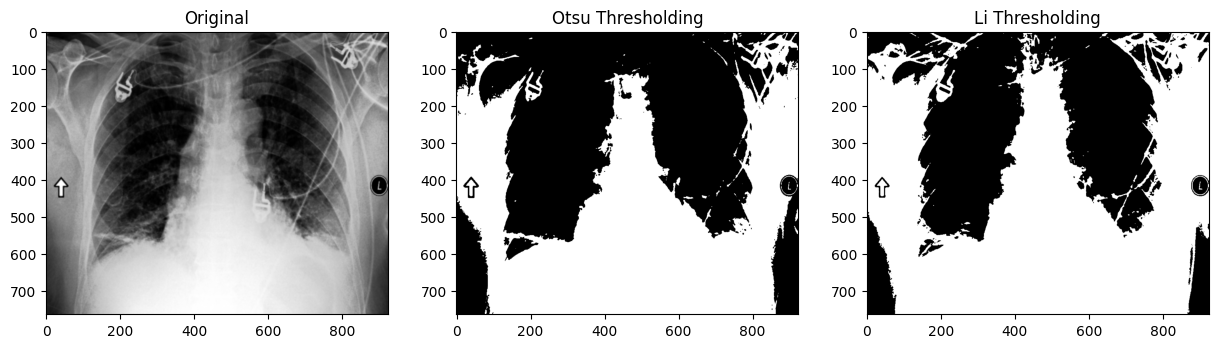

Otsu Threshold: 128.01092440258307
Li Threshold: 102.58320084160609


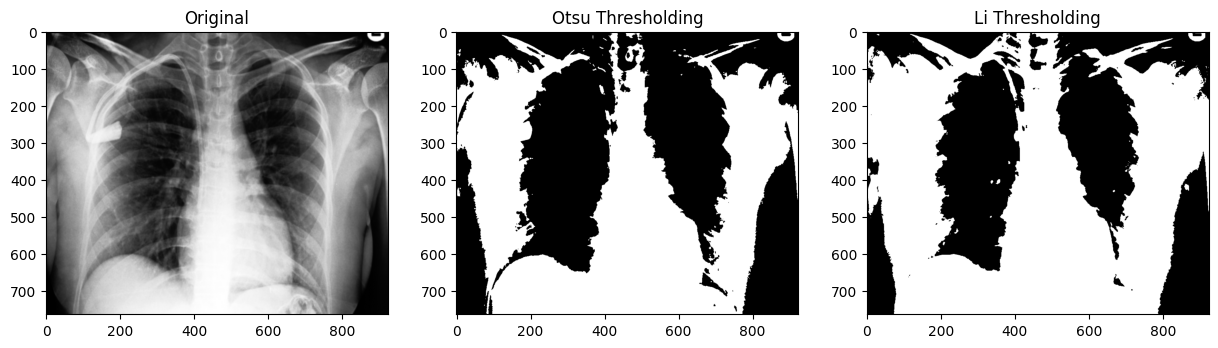

Otsu Threshold: 128.13185748498233
Li Threshold: 102.1179015950275


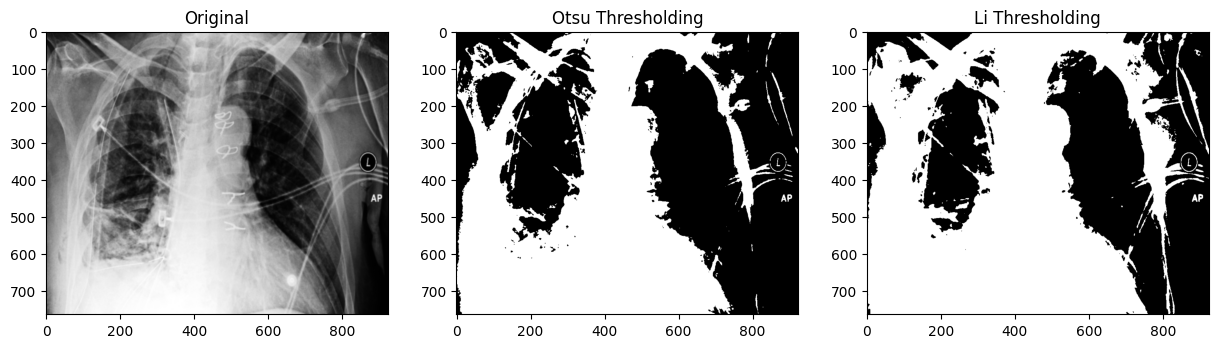

Otsu Threshold: 127.00325744233398
Li Threshold: 102.34904232769169


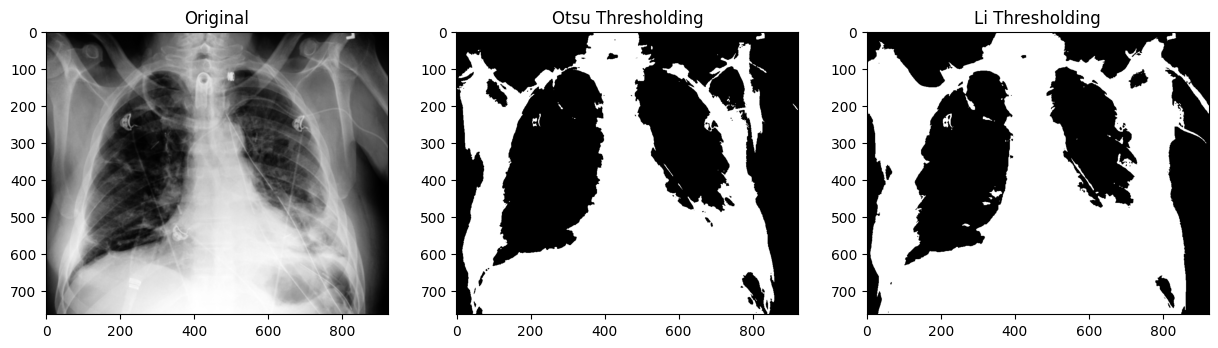

Otsu Threshold: 127.12264823453174
Li Threshold: 102.26415642855619


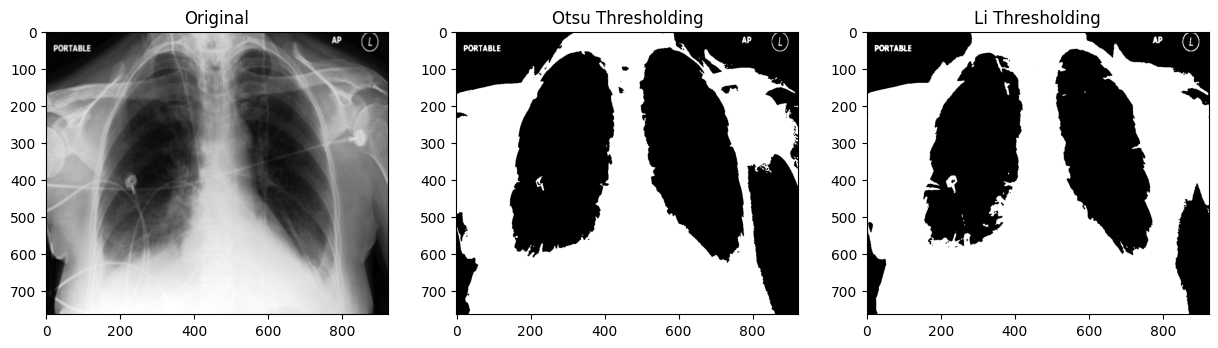

Otsu Threshold: 128.2140437189578
Li Threshold: 102.91005902181742


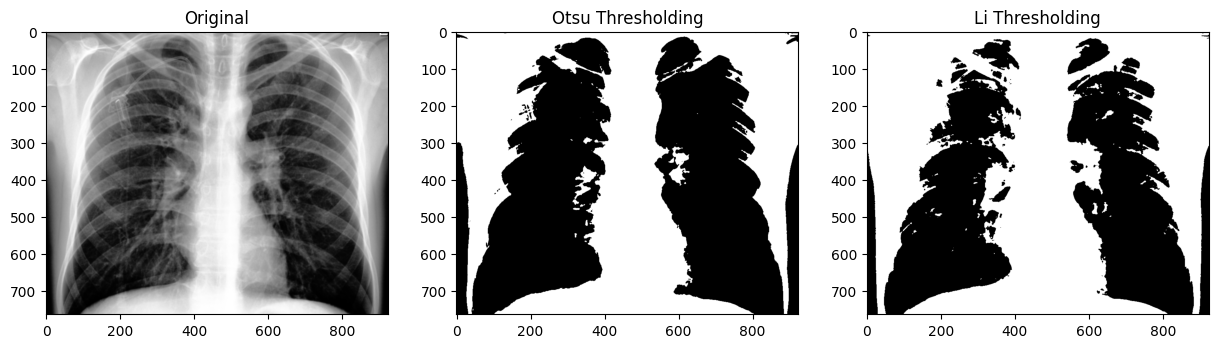

In [12]:
binary_images = []
for denoised_image in denoised_images:
    # Otsu ve li olmak üzere iki farklı thesholding methodu kullanıyoruz.
    threshold_otsu = filters.threshold_otsu(denoised_image)
    threshold_li = filters.threshold_li(denoised_image)

    binary_otsu = denoised_image > threshold_otsu
    binary_li = denoised_image > threshold_li

    #Görüntü yapımıza uygunluğu sebebiyle otsu thresholding yöntemini seçiyoruz.
    binary_images.append(binary_otsu)

    # Görüntüleri ekrana basıyoruz
    print(f"Otsu Threshold: {threshold_otsu}")
    print(f"Li Threshold: {threshold_li}")
    fig, axes = plt.subplots(1, 3, figsize=(15, 7))
    axes[0].imshow(denoised_image, cmap='gray')
    axes[0].set_title('Original')
    axes[1].imshow(binary_otsu, cmap='gray')
    axes[1].set_title('Otsu Thresholding')
    axes[2].imshow(binary_li, cmap='gray')
    axes[2].set_title('Li Thresholding')
    plt.show()


## 5. Post-processing
1.	Uygun morfolojik operatörleri, uygun structural element yapısı ve boyutunu seçerek görüntüye uygulayınız. (YORUM)
 	Giriş ve Çıkış Görüntülerini görseleştirin

2.	Görüntüye bağlantı bileşen analizi (connected component labeling-CCL) (cv2.connectedComponents) uygulayarak olası bölge sayısını print CCL çıktısını plot edin.

3.	Elde ettiğiniz labellar için, Centroid ve Area bilgilerinin kesinlikle olacağı, ayrıca bölgelerin yoğunluk ve şekilsel özelliklerini belirten en az 5 tane özniteliği print edin.
	(cv2.connectedComponentsWithStats önerebilirim ama scikit-image’ın regionprops u daha iyi)

4.	Elde ettiğiniz stats ve labelsları inceleyerek akciğer alanlarını en iyi ifade eden öznitelikleri yorumlayınız.
	Belirlediğniz özniteliklere göre filtreleme yapın. (örn: maks alana sahip ilk iki bölge, if maks alana sahip iki bölge and bölgelerin centroidleri ortada; filter; else try 3. Bölge; return)
	Belirleyici öznitelik bulunamadıysa. Her görüntüde otomatik olarak label belirleyen algoritmayı yazın

5.	Seçtiğiniz labela sahip filtrelenmiş görüntülere uygun morfolojik işlemleri (structural elemant tipi ve boyutu belirleyerek) uygulayın. Giriş ve çıkış görüntülerini görselleştirin.


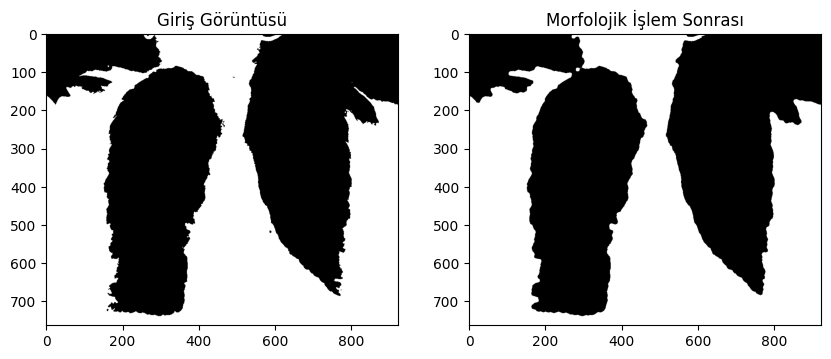

Bölge Sayısı: 3


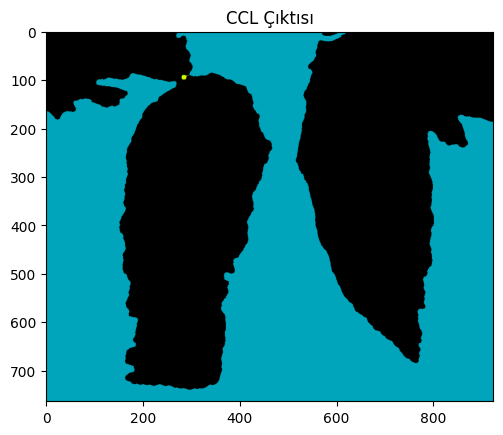

Bölge 1: {'Centroid': (463.67403396240303, 449.7119593062589), 'Area': 353273.0, 'Eccentricity': 0.691172605457379, 'Solidity': 0.539464220542132, 'Extent': 0.5004320504974955, 'Perimeter': 6752.13657737557}
Bölge 2: {'Centroid': (94.89411764705882, 284.2470588235294), 'Area': 85.0, 'Eccentricity': 0.4362686468165879, 'Solidity': 0.9042553191489362, 'Extent': 0.6439393939393939, 'Perimeter': 34.7634559672906}
Bölge 3: {'Centroid': (91.0, 292.5), 'Area': 2.0, 'Eccentricity': 1.0, 'Solidity': 1.0, 'Extent': 1.0, 'Perimeter': 0.0}


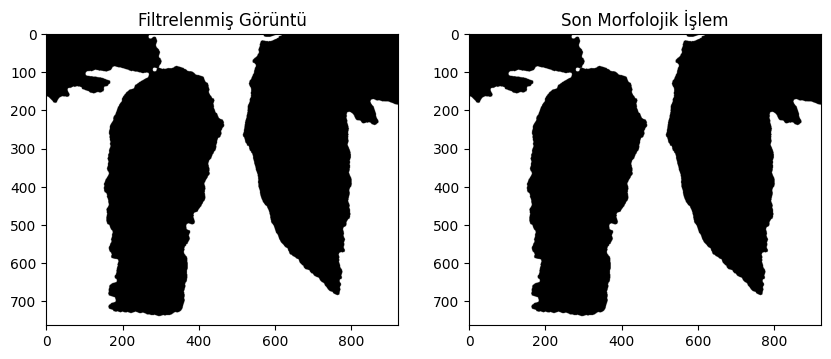

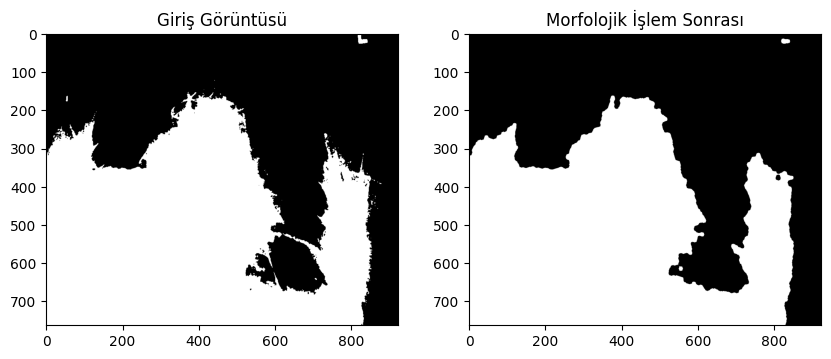

Bölge Sayısı: 3


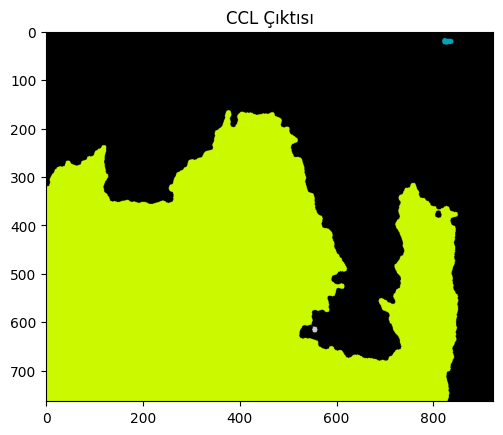

Bölge 1: {'Centroid': (20.94422310756972, 827.7290836653386), 'Area': 251.0, 'Eccentricity': 0.8495632847861708, 'Solidity': 0.9261992619926199, 'Extent': 0.7470238095238095, 'Perimeter': 63.21320343559643}
Bölge 2: {'Centroid': (525.2561422255927, 378.8526899975009), 'Area': 348123.0, 'Eccentricity': 0.7707036036597619, 'Solidity': 0.7755610805897528, 'Extent': 0.6806575801005375, 'Perimeter': 4358.978064360912}
Bölge 3: {'Centroid': (615.8857142857142, 553.9333333333333), 'Area': 105.0, 'Eccentricity': 0.5168292654160337, 'Solidity': 0.9051724137931034, 'Extent': 0.7342657342657343, 'Perimeter': 38.97056274847714}


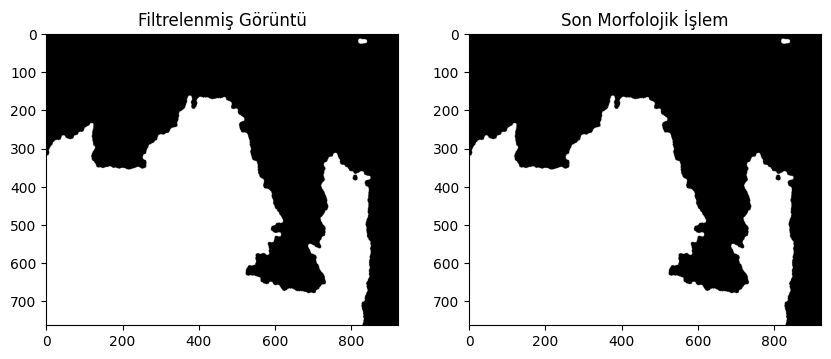

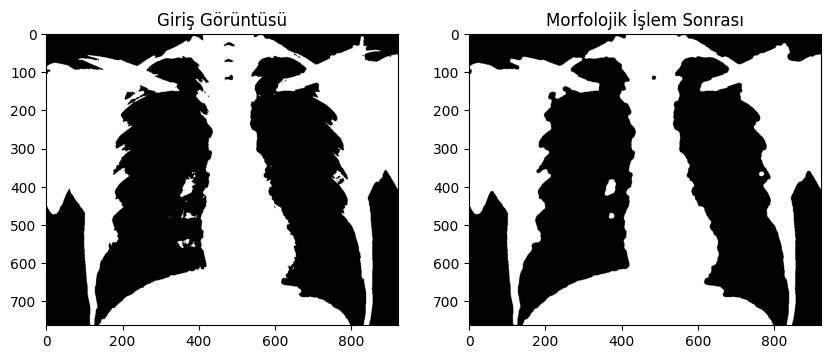

Bölge Sayısı: 5


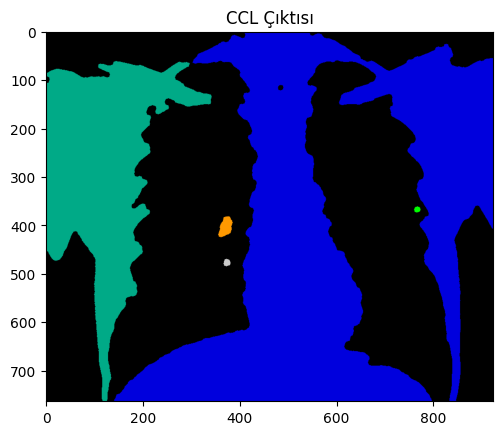

Bölge 1: {'Centroid': (406.1479627301057, 587.8934543381314), 'Area': 256078.0, 'Eccentricity': 0.771218034003166, 'Solidity': 0.5045504071624335, 'Extent': 0.42752631157174914, 'Perimeter': 5644.5812742099915}
Bölge 2: {'Centroid': (294.0113806591212, 118.32008363848202), 'Area': 96128.0, 'Eccentricity': 0.8969039248601959, 'Solidity': 0.6335714850649864, 'Extent': 0.4003931957148331, 'Perimeter': 2492.612444565069}
Bölge 3: {'Centroid': (368.0390625, 765.328125), 'Area': 128.0, 'Eccentricity': 0.4193638965074573, 'Solidity': 0.9343065693430657, 'Extent': 0.7032967032967034, 'Perimeter': 41.21320343559643}
Bölge 4: {'Centroid': (404.1334106728538, 370.0858468677494), 'Area': 862.0, 'Eccentricity': 0.8429780242375436, 'Solidity': 0.9298813376483279, 'Extent': 0.6530303030303031, 'Perimeter': 124.81118318204308}
Bölge 5: {'Centroid': (477.77647058823527, 372.8), 'Area': 170.0, 'Eccentricity': 0.34708058568726147, 'Solidity': 0.9289617486338798, 'Extent': 0.7083333333333334, 'Perimeter':

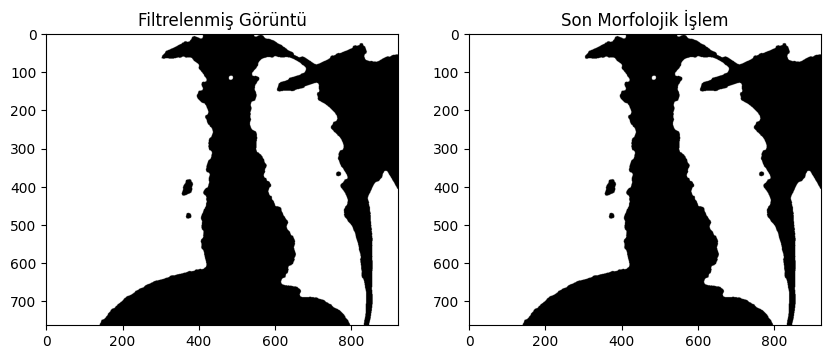

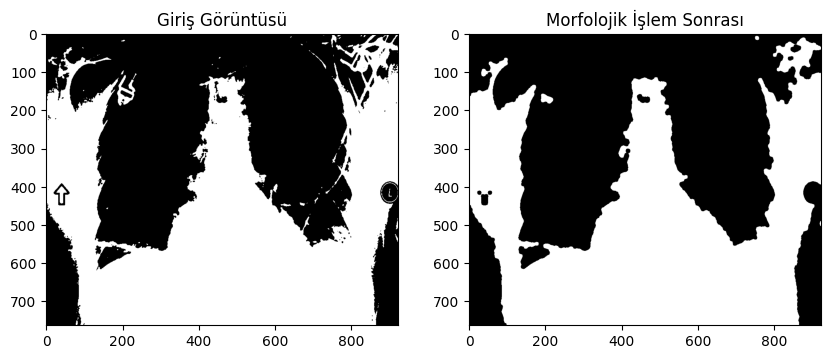

Bölge Sayısı: 5


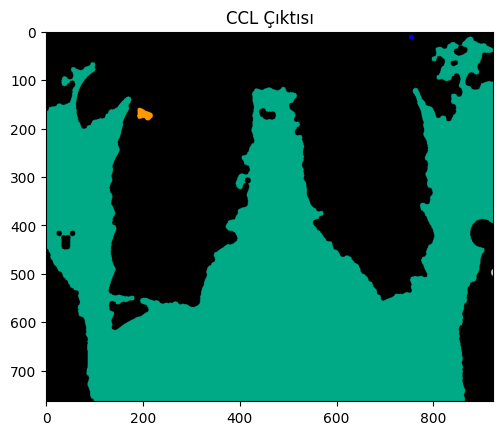

Bölge 1: {'Centroid': (12.5, 753.5), 'Area': 96.0, 'Eccentricity': 0.42640143271122083, 'Solidity': 0.9230769230769231, 'Extent': 0.6666666666666666, 'Perimeter': 35.798989873223334}
Bölge 2: {'Centroid': (492.74214528197314, 480.43870664172556), 'Area': 346416.0, 'Eccentricity': 0.7218086194639198, 'Solidity': 0.5407984213911491, 'Extent': 0.4978872389230955, 'Perimeter': 7024.941843371951}
Bölge 3: {'Centroid': (29.0, 854.0), 'Area': 1.0, 'Eccentricity': 0, 'Solidity': 1.0, 'Extent': 1.0, 'Perimeter': 0.0}
Bölge 4: {'Centroid': (171.8175313059034, 202.2325581395349), 'Area': 559.0, 'Eccentricity': 0.809599564113804, 'Solidity': 0.8929712460063898, 'Extent': 0.6273849607182941, 'Perimeter': 101.74011537017762}
Bölge 5: {'Centroid': (498.0, 920.9), 'Area': 70.0, 'Eccentricity': 0.9031890879219181, 'Solidity': 0.9459459459459459, 'Extent': 0.7777777777777778, 'Perimeter': 34.071067811865476}


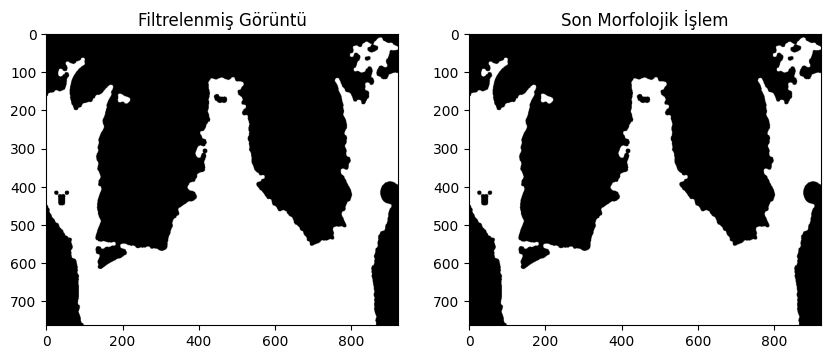

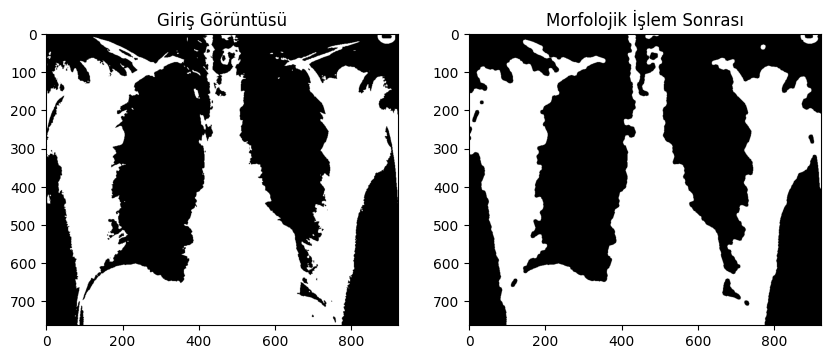

Bölge Sayısı: 6


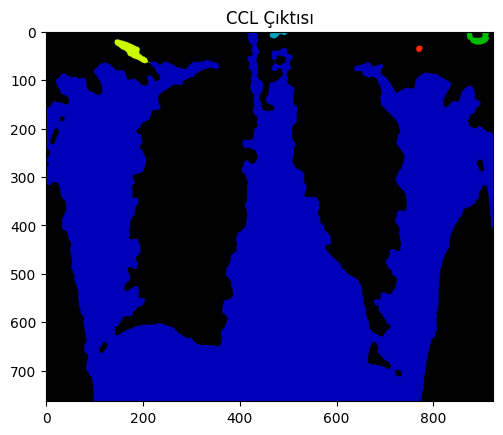

Bölge 1: {'Centroid': (448.3009464595722, 448.63583223268716), 'Area': 346766.0, 'Eccentricity': 0.6198619464636541, 'Solidity': 0.5716683207327568, 'Extent': 0.49121450103125497, 'Perimeter': 8274.748155388861}
Bölge 2: {'Centroid': (5.336021505376344, 477.2016129032258), 'Area': 372.0, 'Eccentricity': 0.9435123812260405, 'Solidity': 0.8571428571428571, 'Extent': 0.5961538461538461, 'Perimeter': 95.97665940288701}
Bölge 3: {'Centroid': (13.954377311960542, 891.8705302096178), 'Area': 811.0, 'Eccentricity': 0.8333913077764159, 'Solidity': 0.725402504472272, 'Extent': 0.6296583850931677, 'Perimeter': 159.77564927611036}
Bölge 4: {'Centroid': (39.86439393939394, 175.36136363636365), 'Area': 1320.0, 'Eccentricity': 0.9606615120945954, 'Solidity': 0.8707124010554089, 'Extent': 0.37714285714285717, 'Perimeter': 194.3086578651014}
Bölge 5: {'Centroid': (36.2043795620438, 769.3941605839416), 'Area': 137.0, 'Eccentricity': 0.427626340438315, 'Solidity': 0.9383561643835616, 'Extent': 0.69897959

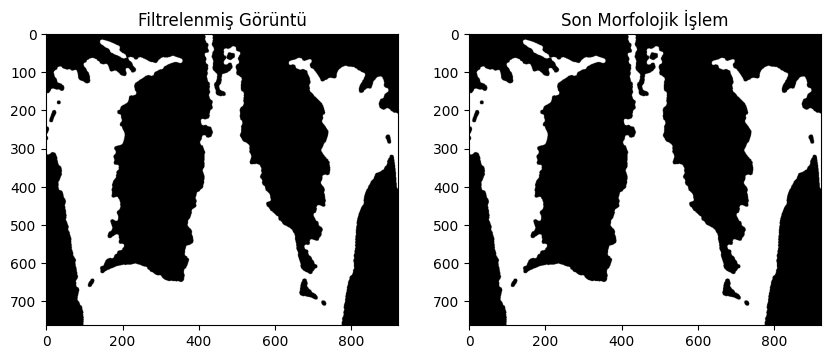

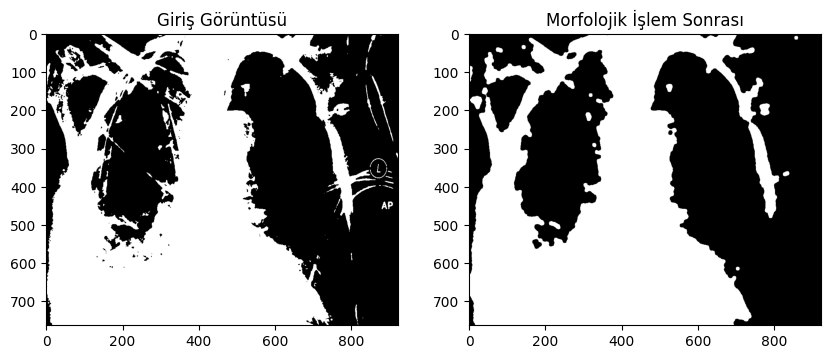

Bölge Sayısı: 14


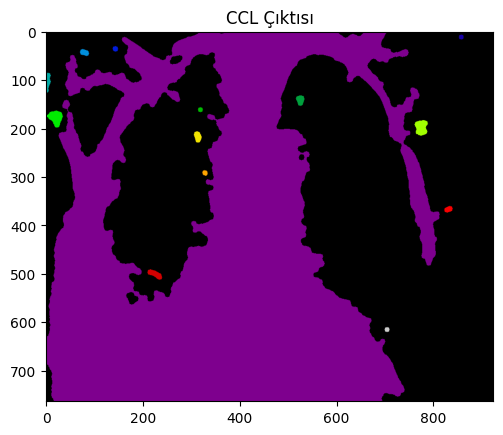

Bölge 1: {'Centroid': (446.8678713042553, 360.2469861883599), 'Area': 338193.0, 'Eccentricity': 0.5605991749217384, 'Solidity': 0.5881740140663805, 'Extent': 0.5451490083305393, 'Perimeter': 7727.331849785434}
Bölge 2: {'Centroid': (12.0, 856.0), 'Area': 81.0, 'Eccentricity': 0.0, 'Solidity': 0.9101123595505618, 'Extent': 0.6694214876033058, 'Perimeter': 32.970562748477136}
Bölge 3: {'Centroid': (36.36, 142.64), 'Area': 100.0, 'Eccentricity': 0.304568390943487, 'Solidity': 0.9259259259259259, 'Extent': 0.6944444444444444, 'Perimeter': 36.384776310850235}
Bölge 4: {'Centroid': (43.96938775510204, 78.85714285714286), 'Area': 196.0, 'Eccentricity': 0.7730526863342982, 'Solidity': 0.9245283018867925, 'Extent': 0.6877192982456141, 'Perimeter': 54.87005768508881}
Bölge 5: {'Centroid': (104.19543973941369, 3.498371335504886), 'Area': 307.0, 'Eccentricity': 0.9762604306316235, 'Solidity': 0.8872832369942196, 'Extent': 0.7309523809523809, 'Perimeter': 95.83452377915606}
Bölge 6: {'Centroid': (1

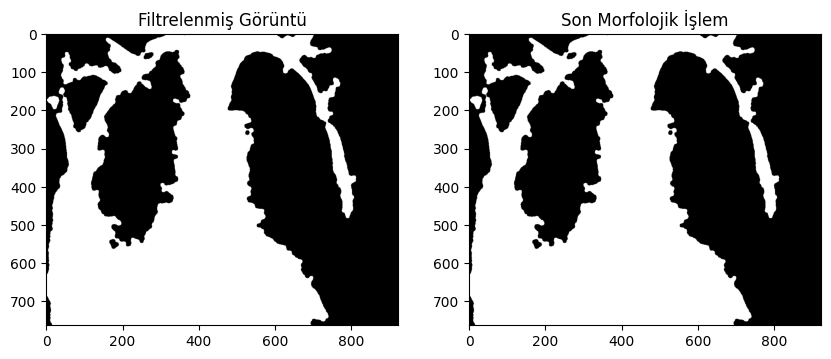

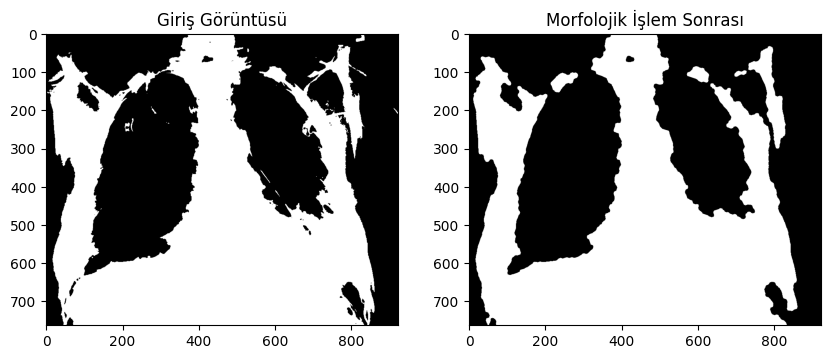

Bölge Sayısı: 5


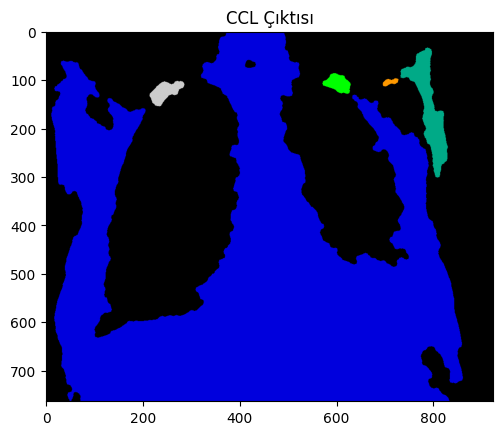

Bölge 1: {'Centroid': (486.0088038616536, 432.47211667626175), 'Area': 338715.0, 'Eccentricity': 0.5603383418110052, 'Solidity': 0.6006341223806543, 'Extent': 0.5221958078182525, 'Perimeter': 6367.130660189909}
Bölge 2: {'Centroid': (160.0516276413478, 789.8764134780125), 'Area': 8755.0, 'Eccentricity': 0.9837250118522539, 'Solidity': 0.6214949953858168, 'Extent': 0.3321068204233366, 'Perimeter': 698.1564209736038}
Bölge 3: {'Centroid': (107.92278238672623, 601.7555839183152), 'Area': 1567.0, 'Eccentricity': 0.7848470187462037, 'Solidity': 0.912638322655795, 'Extent': 0.6176586519511233, 'Perimeter': 169.92388155425118}
Bölge 4: {'Centroid': (104.91818181818182, 709.5030303030303), 'Area': 330.0, 'Eccentricity': 0.9384635220488869, 'Solidity': 0.8333333333333334, 'Extent': 0.5555555555555556, 'Perimeter': 87.49747468305833}
Bölge 5: {'Centroid': (125.15753086419753, 245.34172839506172), 'Area': 2025.0, 'Eccentricity': 0.887546834676916, 'Solidity': 0.8576874205844981, 'Extent': 0.52339

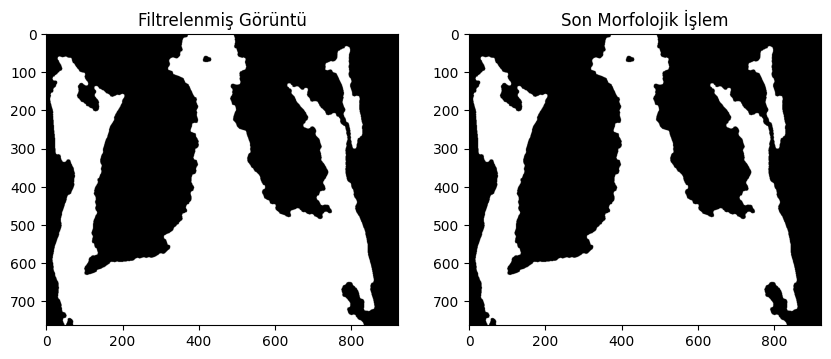

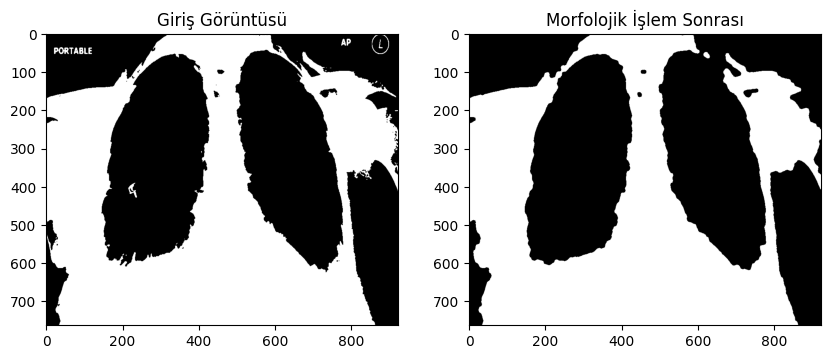

Bölge Sayısı: 2


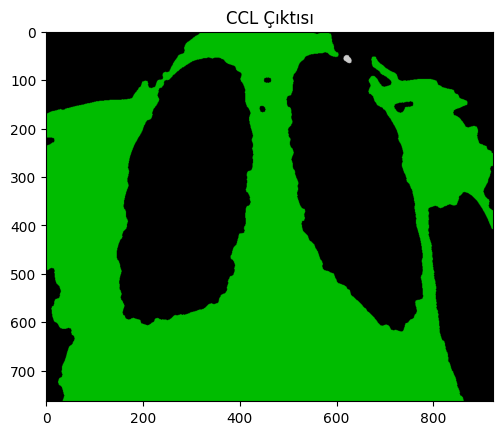

Bölge 1: {'Centroid': (455.25366701306666, 420.55183506817264), 'Area': 352194.0, 'Eccentricity': 0.5113597802916255, 'Solidity': 0.5559916142028125, 'Extent': 0.4989035833276671, 'Perimeter': 7012.48495322871}
Bölge 2: {'Centroid': (57.57788944723618, 621.572864321608), 'Area': 199.0, 'Eccentricity': 0.740689989733762, 'Solidity': 0.9386792452830188, 'Extent': 0.6141975308641975, 'Perimeter': 53.941125496954285}


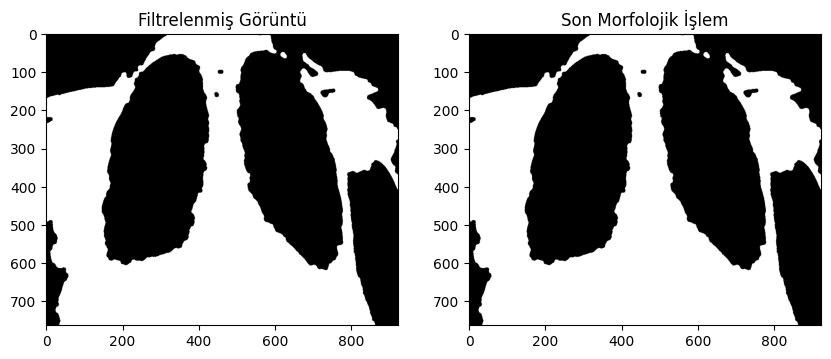

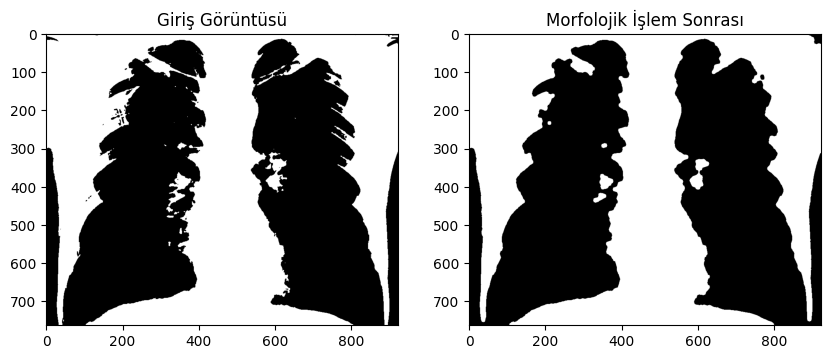

Bölge Sayısı: 6


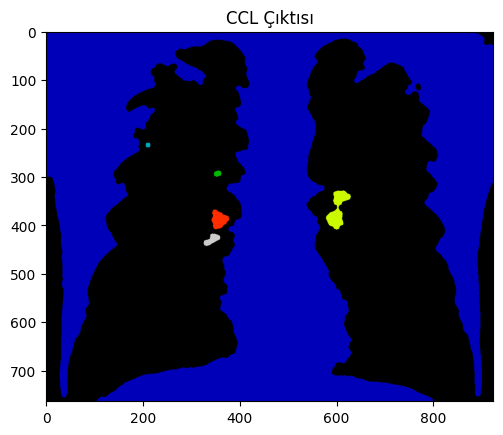

Bölge 1: {'Centroid': (339.9833992141086, 451.5887256163166), 'Area': 342032.0, 'Eccentricity': 0.5077863153493929, 'Solidity': 0.49475278417054935, 'Extent': 0.4845085106865212, 'Perimeter': 8196.90021281161}
Bölge 2: {'Centroid': (235.0, 210.0), 'Area': 81.0, 'Eccentricity': 0.0, 'Solidity': 0.9101123595505618, 'Extent': 0.6694214876033058, 'Perimeter': 32.970562748477136}
Bölge 3: {'Centroid': (294.0, 353.5), 'Area': 152.0, 'Eccentricity': 0.6494428311078776, 'Solidity': 0.9382716049382716, 'Extent': 0.7307692307692307, 'Perimeter': 45.79898987322333}
Bölge 4: {'Centroid': (368.42979635584135, 601.1093247588425), 'Area': 1866.0, 'Eccentricity': 0.9359533805723412, 'Solidity': 0.6664285714285715, 'Extent': 0.443019943019943, 'Perimeter': 253.17871555019022}
Bölge 5: {'Centroid': (388.9650565262076, 356.61459403905445), 'Area': 973.0, 'Eccentricity': 0.42772502368158927, 'Solidity': 0.9153339604891816, 'Extent': 0.6261261261261262, 'Perimeter': 131.88225099390854}
Bölge 6: {'Centroid'

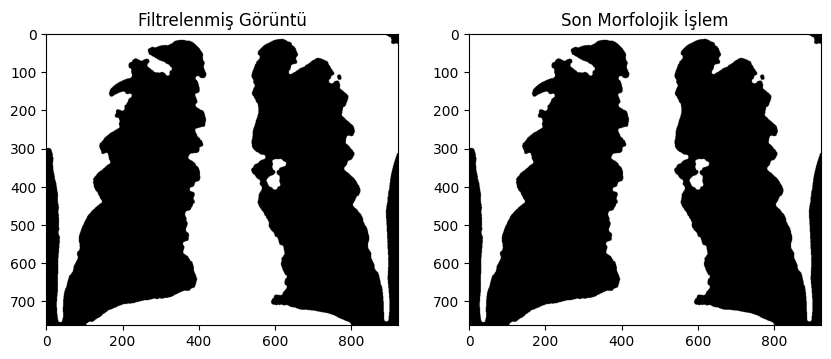

In [13]:

def post_processing(binary_image):
    # 1. Morfolojik İşlemler
    struct_element = disk(5)
    # processed_image'ı uint8 türüne dönüştürüyoruz
    processed_image = closing(opening(binary_image, struct_element), struct_element).astype(np.uint8)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(binary_image, cmap='gray')
    plt.title("Giriş Görüntüsü")

    plt.subplot(1,2,2)
    plt.imshow(processed_image, cmap='gray')
    plt.title("Morfolojik İşlem Sonrası")
    plt.show()

    # 2. Görüntüye bağlantı bileşen analizi yapıyoruz
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(processed_image, connectivity=8)
    print(f"Bölge Sayısı: {num_labels - 1}")
    plt.imshow(labels, cmap='nipy_spectral')
    plt.title("CCL Çıktısı")
    plt.show()

    # 3. Özniteliklerin Belirlenmesi
    properties = regionprops(label(processed_image))
    features = []
    for prop in properties:
        feature_dict = {
            'Centroid': prop.centroid,
            'Area': prop.area,
            'Eccentricity': prop.eccentricity,
            'Solidity': prop.solidity,
            'Extent': prop.extent,
            'Perimeter': prop.perimeter
        }
        features.append(feature_dict)

    for i, feat in enumerate(features):
        print(f"Bölge {i+1}: {feat}")

    # 4. Akciğer Alanlarının Belirlenmesi
    sorted_regions = sorted(features, key=lambda x: x['Area'], reverse=True)
    lung_regions = sorted_regions[:2]  # En büyük iki bölge seçimi

    if len(lung_regions) < 2:
        print("Akciğer bölgeleri belirlenemedi.")
        return

    # 5. Seçili Bölgelerin Filtrelenmesi
    filtered_image = np.zeros_like(binary_image)
    for region in lung_regions:
        cy, cx = region['Centroid']
        filtered_image[labels == labels[int(cy), int(cx)]] = 255

    processed_filtered = closing(filtered_image, struct_element)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title("Filtrelenmiş Görüntü")

    plt.subplot(1,2,2)
    plt.imshow(processed_filtered, cmap='gray')
    plt.title("Son Morfolojik İşlem")
    plt.show()

    return processed_filtered

for binary_image in binary_images:
    post_processing(binary_image)




##6.	Sonuçlar
1.	İşlemler sonucunda elde ettiğiniz maske ile orijinal görüntüyü çarparak görüntü işleme sonuçlarını görselleştirip yorumlayın.


Görüntüler yüklenip kontrast artırdık, eşikleme ve morfolojik işlemlerle iyileştirilerek akciğer bölgeleri belirlemeye çalıştık. Ancak en büyük iki bölgeyi seçme yöntemi her zaman iyi sonuç vermedi gibi. Daha gelişmiş bir model, özellikle derin öğrenme tabanlı yaklaşımlar, daha tutarlı sonuçlar verebilir bize. Hata kontrolleri eklenmeli, parametreler optimize edilmelerek daha iyi hale getirilebilir.
